## Import Libraries

In [1]:
#!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
#!pip install textblob
from textblob import TextBlob
import nltk
import re
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet
from wordcloud import STOPWORDS
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Import/Read Datasets

In [2]:
true = pd.read_csv('True.csv',encoding='ISO-8859-1')
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  31-Dec-17  
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  29-Dec-17  
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  31-Dec-17  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  30-Dec-17  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  29-Dec-17

In [3]:
fake = pd.read_csv('Fake.csv',encoding='ISO-8859-1')
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

## Exploratory Data Analysis (EDA)

In [4]:
true.shape, fake.shape

((21417, 4), (23481, 4))

In [5]:
true.info(),
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.columns, fake.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [7]:
# Adding new column to distribute Fake and Real news

# fake news represented by '0'
# true news represented by '1'


true['category'] = '1'
fake['category'] = '0'

In [8]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  31-Dec-17   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  29-Dec-17   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  31-Dec-17   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  30-Dec-17   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  29-Dec-17   

  category  
0        1  
1        1  
2        1  
3        1  
4        1

In [9]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date category  
0  December 31, 2017        0  
1  December 31, 2017        0  
2  December 30, 2017        0  
3  December 29, 2017        0  
4  December 25, 2017        0

In [10]:
# Resetting index

df = pd.concat([true,fake]).reset_index(drop = True)
df.shape

(44898, 5)

In [11]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  31-Dec-17   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  29-Dec-17   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  31-Dec-17   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  30-Dec-17   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  29-Dec-17   

  category  
0        1  
1        1  
2        1  
3        1  
4        1

In [12]:
df.tail()

title  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied Safe Zone Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date category  
44893  January 16, 2016        0  
44894  January 16, 2016        0  
44895  January 15, 2016        0  
44896  January 14, 2016        0  
44897  January 12, 2016        0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [14]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

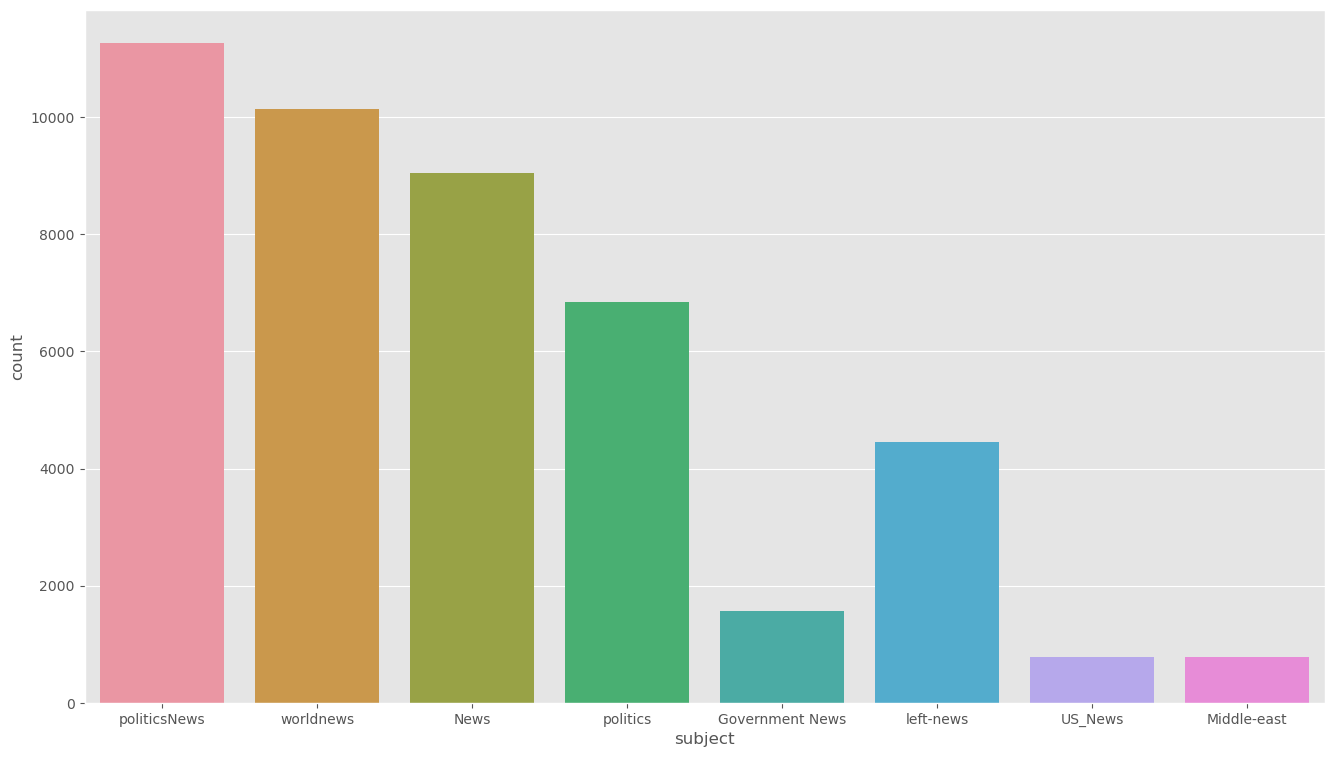

In [15]:
# lets visualize data based on the subject of the news

plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

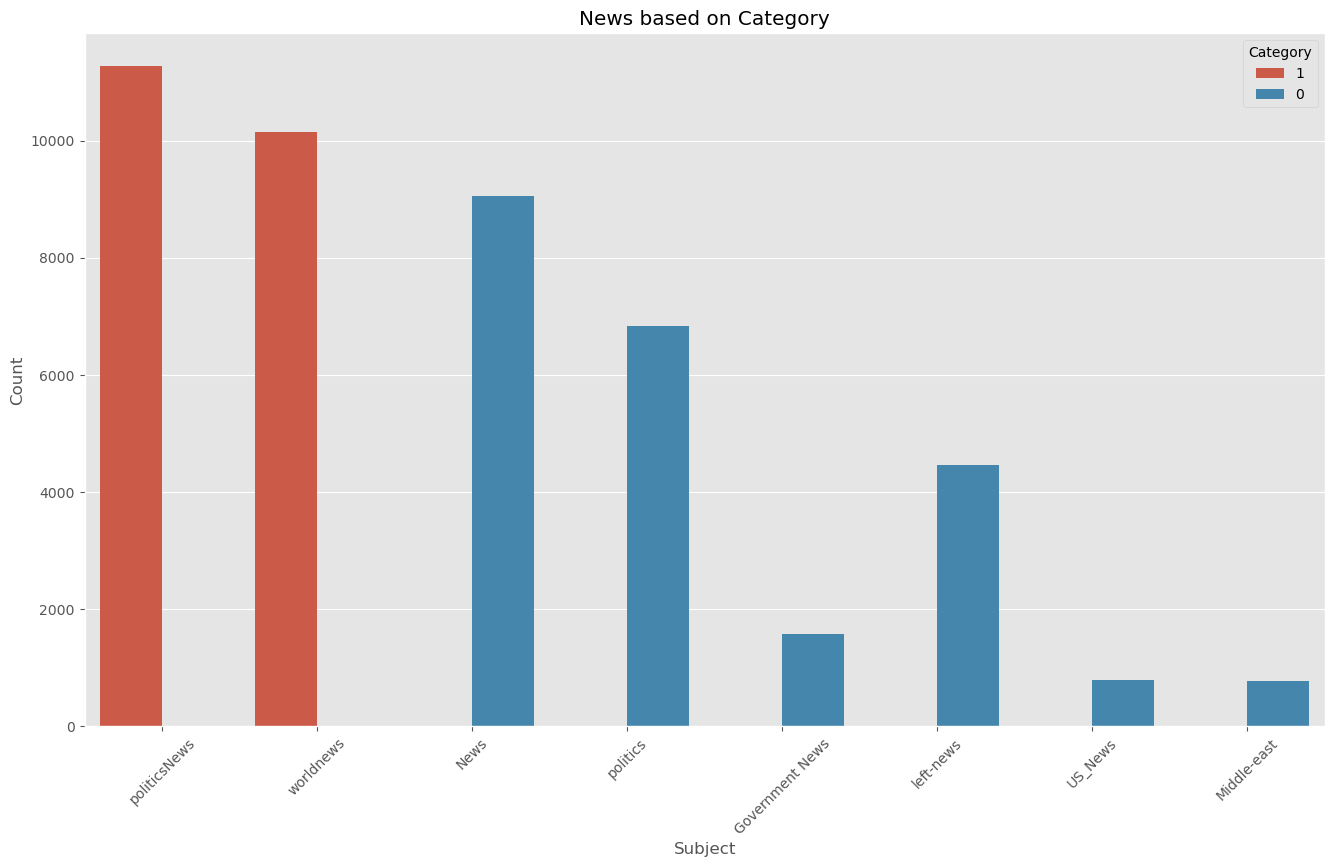

In [16]:
# breakup of true and fake news based on the category.

plt.figure(figsize=(16, 9))
sns.countplot(x='subject', hue='category', data=df)
plt.legend(title='Category', labels=['1', '0'])
plt.title('News based on Category')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Shuffling the data

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)

In [18]:
df.head(10)

title  \
0  Suspected Boko Haram suicide bombers kill at l...   
1  Pakistan army's role in focus as Islamists end...   
2   The Trump Administration Is Helping Scam Univ...   
3  Senate delays healthcare vote as McCain recove...   
4  MUSLIM IMMIGRANT BEATS 22-Term MN Democrat&Tha...   
5   Al Franken Hilariously Roasts Ted Cruz During...   
6   Donald Trump Gets Brutally Shut Down By Micke...   
7  China says nothing will stop its long-range ai...   
8  ANGRY DAD CONFRONTS SCHOOL BOARD After Finding...   
9  POPE MEETS WITH ANGRY, JEWISH, PR0 LATE-TERM A...   

                                                text          subject  \
0  BAUCHI, Nigeria (Reuters) - Suspected Boko Har...        worldnews   
1  ISLAMABAD (Reuters) - When hardline Pakistani ...        worldnews   
2  Trump s Department of Education is delaying ac...             News   
3  WASHINGTON (Reuters) - The U.S. Senate will de...     politicsNews   
4  The number of Muslim registered voters is up 3...         politics   
5  Al Franken returned to his comedic roots last ...             News   
6  Trust fund tycoon and wannabe President Donald...             News   
7  BEIJING (Reuters) - No amount of interference ...        worldnews   
8  We can t say enough great things about this da...  Government News   
9  As a Catholic I m offended by this Pope s poli...        left-news   

                 date category  
0            2-Dec-17        1  
1           28-Nov-17        1  
2  September 13, 2017        0  
3           16-Jul-17        1  
4        Aug 13, 2016        0  
5      April 20, 2016        0  
6       April 8, 2016        0  
7           25-Aug-17        1  
8         May 5, 2017        0  
9        Apr 16, 2016        0

<AxesSubplot:ylabel='subject'>

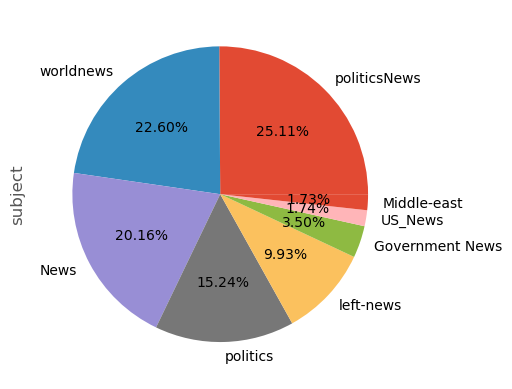

In [19]:
df['subject'].value_counts().plot(kind='pie',autopct='%0.02f%%')

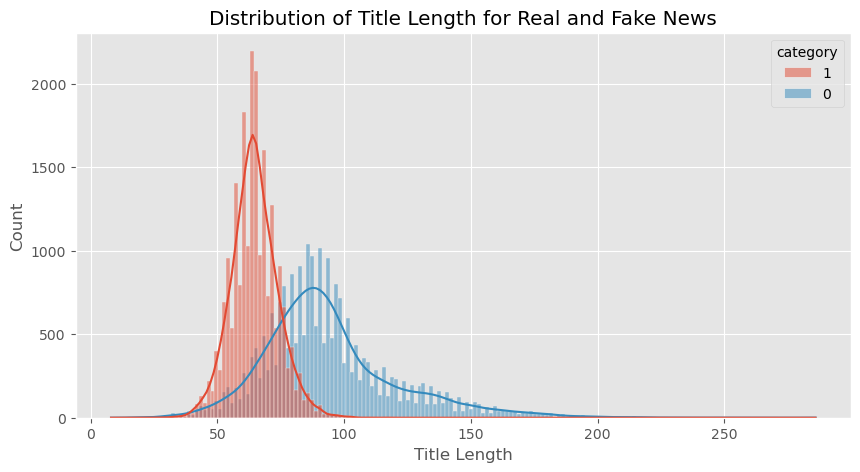

In [20]:
#Text Length Analysis
df['title_len'] = df['title'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data= df, x='title_len', hue='category', kde=True)
plt.title('Distribution of Title Length for Real and Fake News')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='category', ylabel='count'>

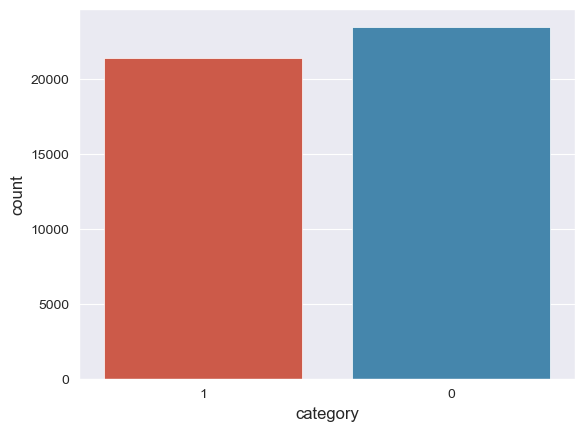

In [21]:
# Visualizing balacing of the data 

import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x= 'category', data = df)

In [22]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
category     0
title_len    0
dtype: int64

In [23]:
# From all the above exploration, it shows we have pretty balanced data with no null values
# There are total 44898 observations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   category   44898 non-null  object
 5   title_len  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [25]:
# Merge the 'title' and 'text' column which will be used in NLP model
df['text'] = df['title'] + " " + df['text']


In [26]:
df.head()

title  \
0  Suspected Boko Haram suicide bombers kill at l...   
1  Pakistan army's role in focus as Islamists end...   
2   The Trump Administration Is Helping Scam Univ...   
3  Senate delays healthcare vote as McCain recove...   
4  MUSLIM IMMIGRANT BEATS 22-Term MN Democrat&Tha...   

                                                text       subject  \
0  Suspected Boko Haram suicide bombers kill at l...     worldnews   
1  Pakistan army's role in focus as Islamists end...     worldnews   
2   The Trump Administration Is Helping Scam Univ...          News   
3  Senate delays healthcare vote as McCain recove...  politicsNews   
4  MUSLIM IMMIGRANT BEATS 22-Term MN Democrat&Tha...      politics   

                 date category  title_len  
0            2-Dec-17        1         75  
1           28-Nov-17        1         65  
2  September 13, 2017        0         86  
3           16-Jul-17        1         61  
4        Aug 13, 2016        0        136

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   category   44898 non-null  object
 5   title_len  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [28]:
del df['title']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44898 non-null  object
 1   subject    44898 non-null  object
 2   date       44898 non-null  object
 3   category   44898 non-null  object
 4   title_len  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Stopword Removal, Lemmatization

In [30]:
#Using wordnet POS (part of speech) to correct the word grammetically.

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [31]:
def data_processing(text):
    text = text.lower() # Helps to convert all text to lowercase
    text = re.sub(r'https?:\S+|www\S+', '', text, flags=re.MULTILINE)  # Regular Expression helps to remove 'https','www',unwanted urls from the text
    text = re.sub(r'\@\S+|\#', '', text)  # Regular Expression helps to remove unwanted symbols and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Regular Expression helps to remove unwanted punctuations
    text_tokens = word_tokenize(text)  # Tokenization helps to split words into individual words
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in text_tokens if not word in stop_words]

    lemmatizer = WordNetLemmatizer()
    df_lem = [lemmatizer.lemmatize(word, get_wordnet_pos(word[0])) for word in text_tokens]
    
    return " ".join(df_lem) # this will join the filtered text in to a single string

In [32]:
# Returns cleaned data (removes all the hashtags, urls, punctuations)

df['text'] = df['text'].apply(data_processing)

In [33]:
df.head(10)

text          subject  \
0  suspected boko haram suicide bomber kill at le...        worldnews   
1  pakistan army role in focus a islamist end bla...        worldnews   
2  the trump administration is helping scam unive...             News   
3  senate delay healthcare vote a mccain recovers...     politicsNews   
4  muslim immigrant beat 22term mn democratthanks...         politics   
5  al franken hilariously roast ted cruz during v...             News   
6  donald trump get brutally shut down by mickey ...             News   
7  china say nothing will stop it longrange air f...        worldnews   
8  angry dad confronts school board after finding...  Government News   
9  pope meet with angry jewish pr0 lateterm abort...        left-news   

                 date category  title_len  
0            2-Dec-17        1         75  
1           28-Nov-17        1         65  
2  September 13, 2017        0         86  
3           16-Jul-17        1         61  
4        Aug 13, 2016        0        136  
5      April 20, 2016        0         78  
6       April 8, 2016        0         85  
7           25-Aug-17        1         60  
8         May 5, 2017        0         96  
9        Apr 16, 2016        0        106

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44898 non-null  object
 1   subject    44898 non-null  object
 2   date       44898 non-null  object
 3   category   44898 non-null  object
 4   title_len  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [35]:
df['category'] = df['category'].astype(int)

# Filter the 'True' and 'Fake' categories separately
true_category_data = df[df['category'] == 1]
fake_category_data = df[df['category'] == 0]

Text(0.5, 1.0, 'Category distribution')

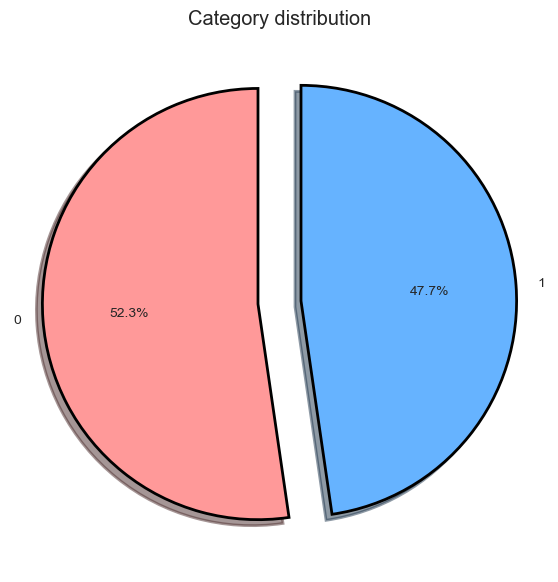

In [36]:
fig = plt.figure(figsize=(7,7))
colors = ("#ff9999", "#66b3ff")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df['category'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Category distribution')

In [37]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

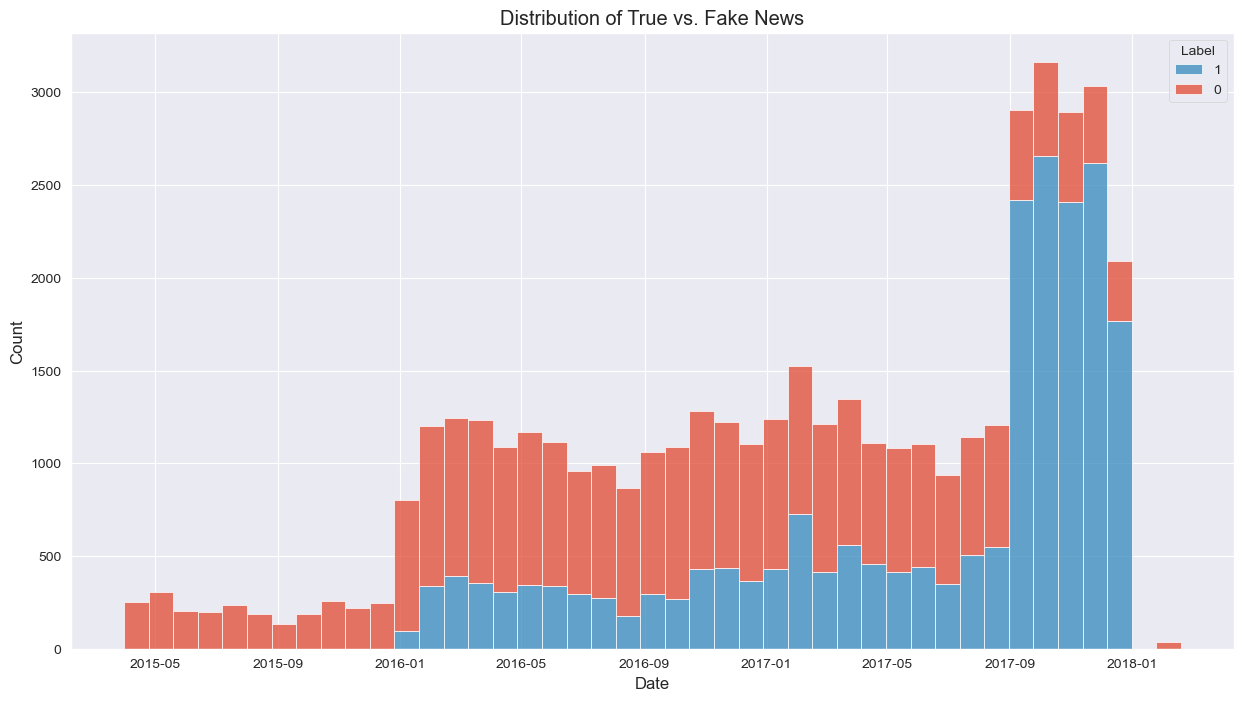

In [38]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='date', hue='category', multiple='stack')
plt.title('Distribution of True vs. Fake News')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

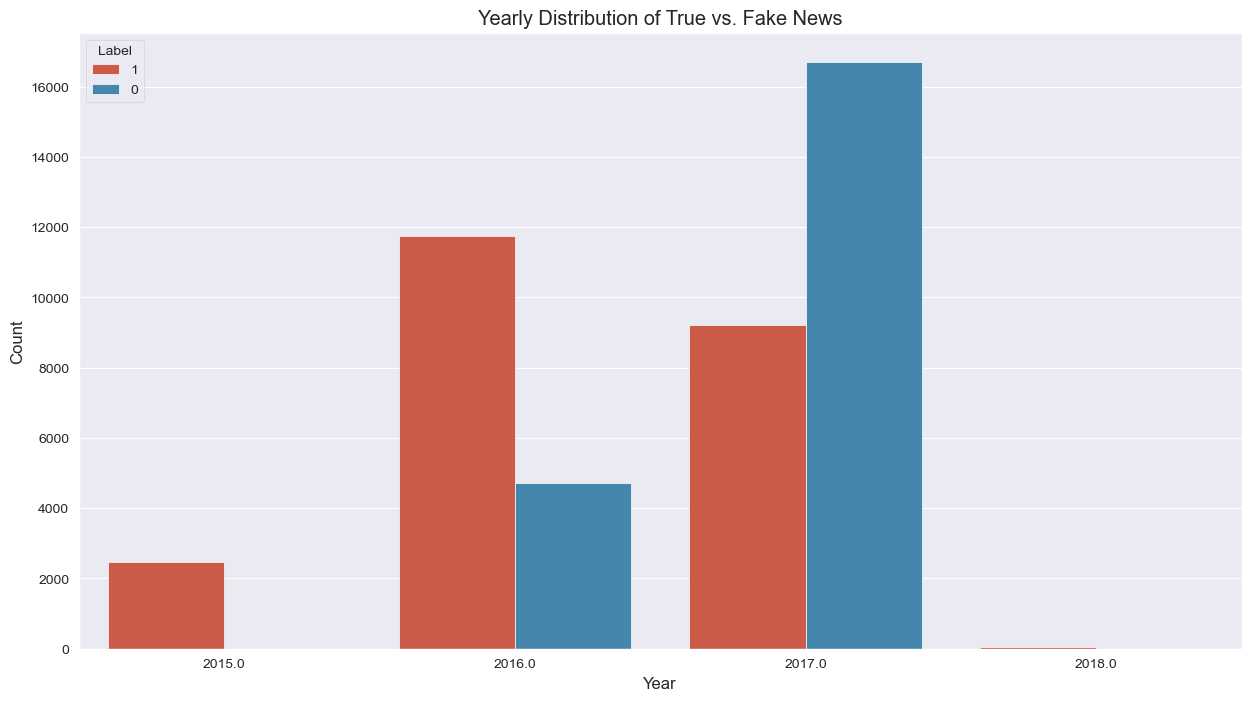

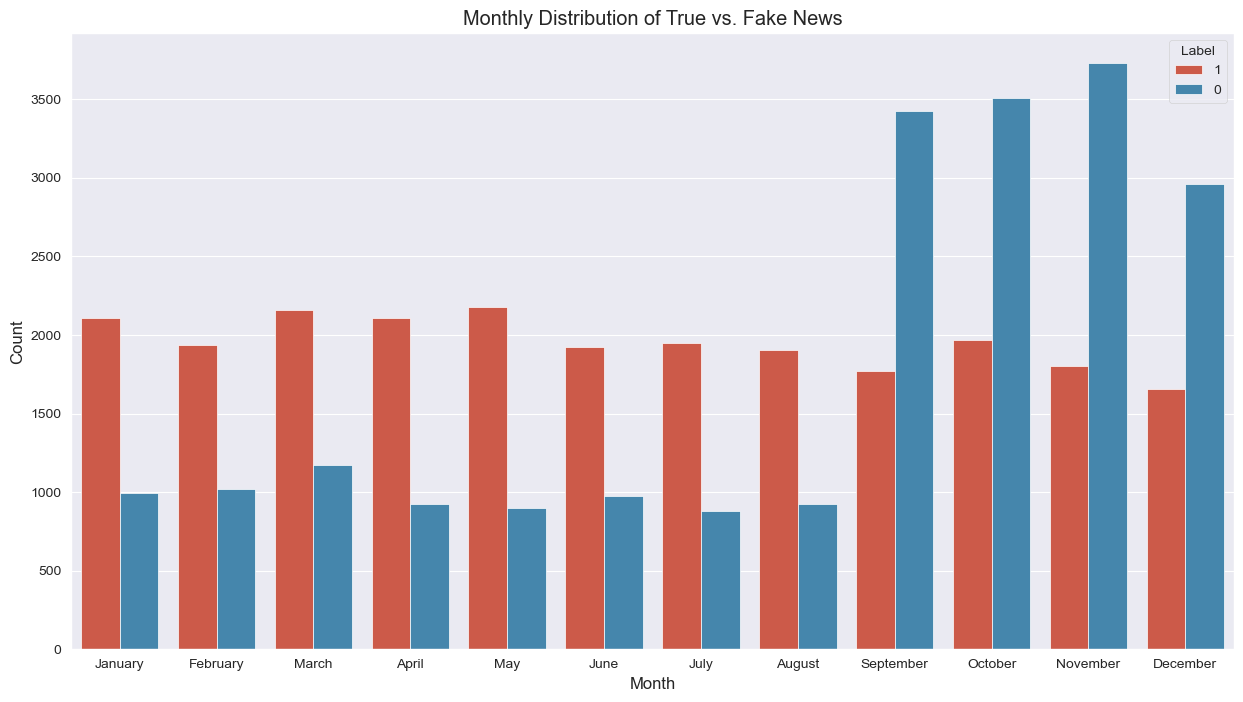

In [39]:
import calendar

month_names = list(calendar.month_name)[1:]

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='year', hue='category')
plt.title('Yearly Distribution of True vs. Fake News')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='month', hue='category')
plt.title('Monthly Distribution of True vs. Fake News')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.xticks(range(12), month_names)
plt.show()

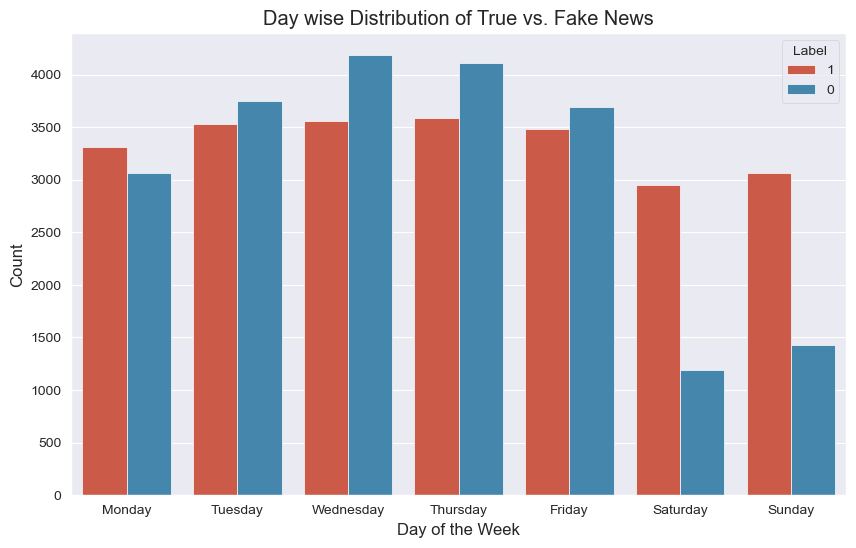

In [40]:
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='category', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day wise Distribution of True vs. Fake News')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

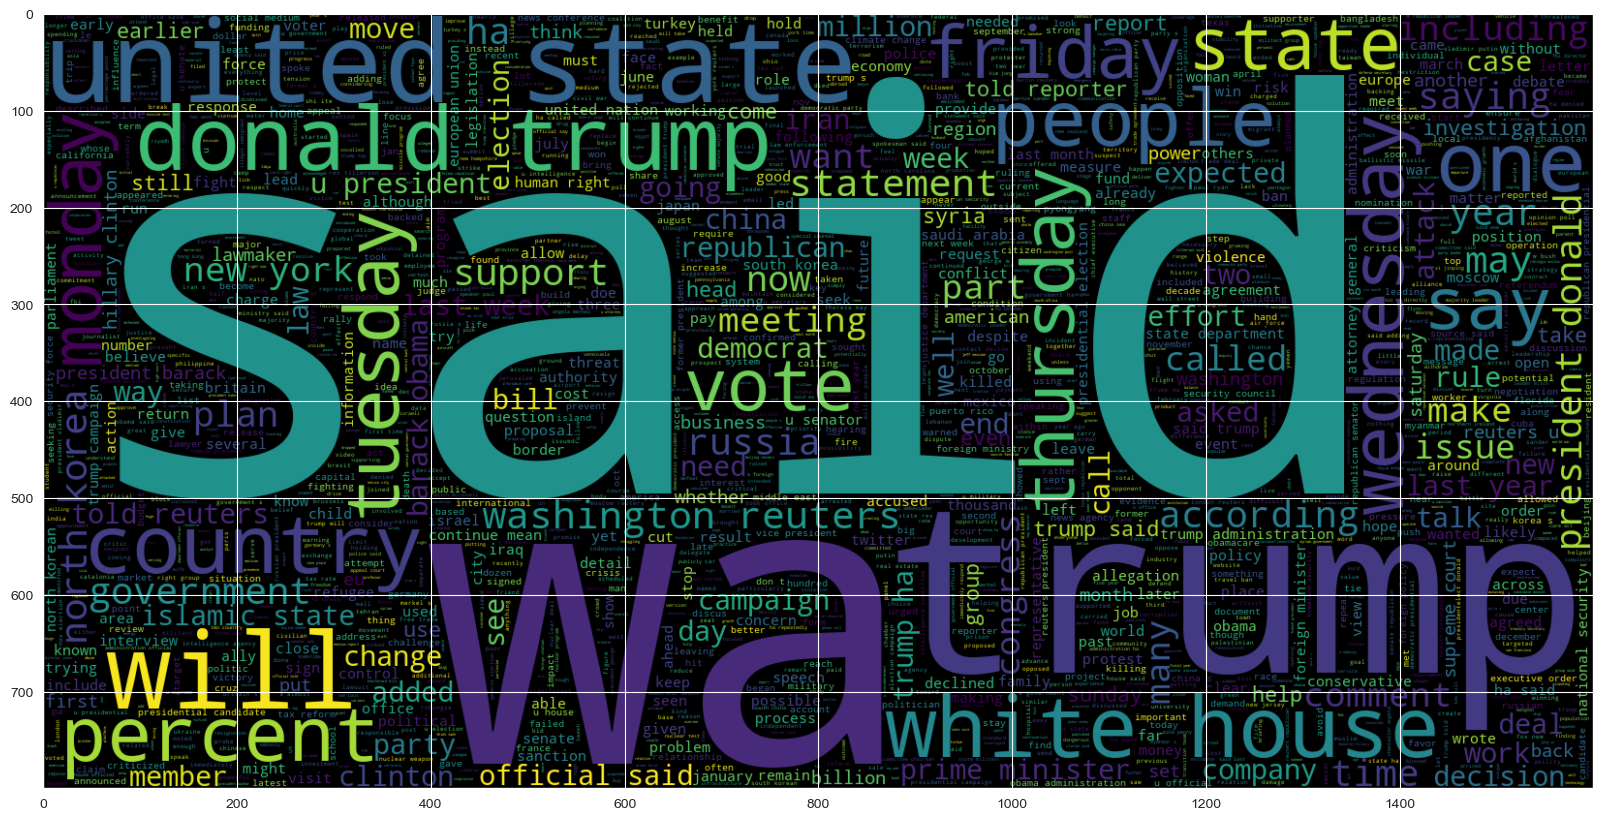

In [41]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in True dataset

plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==1].text))
plt.imshow(wc, interpolation = 'bilinear')

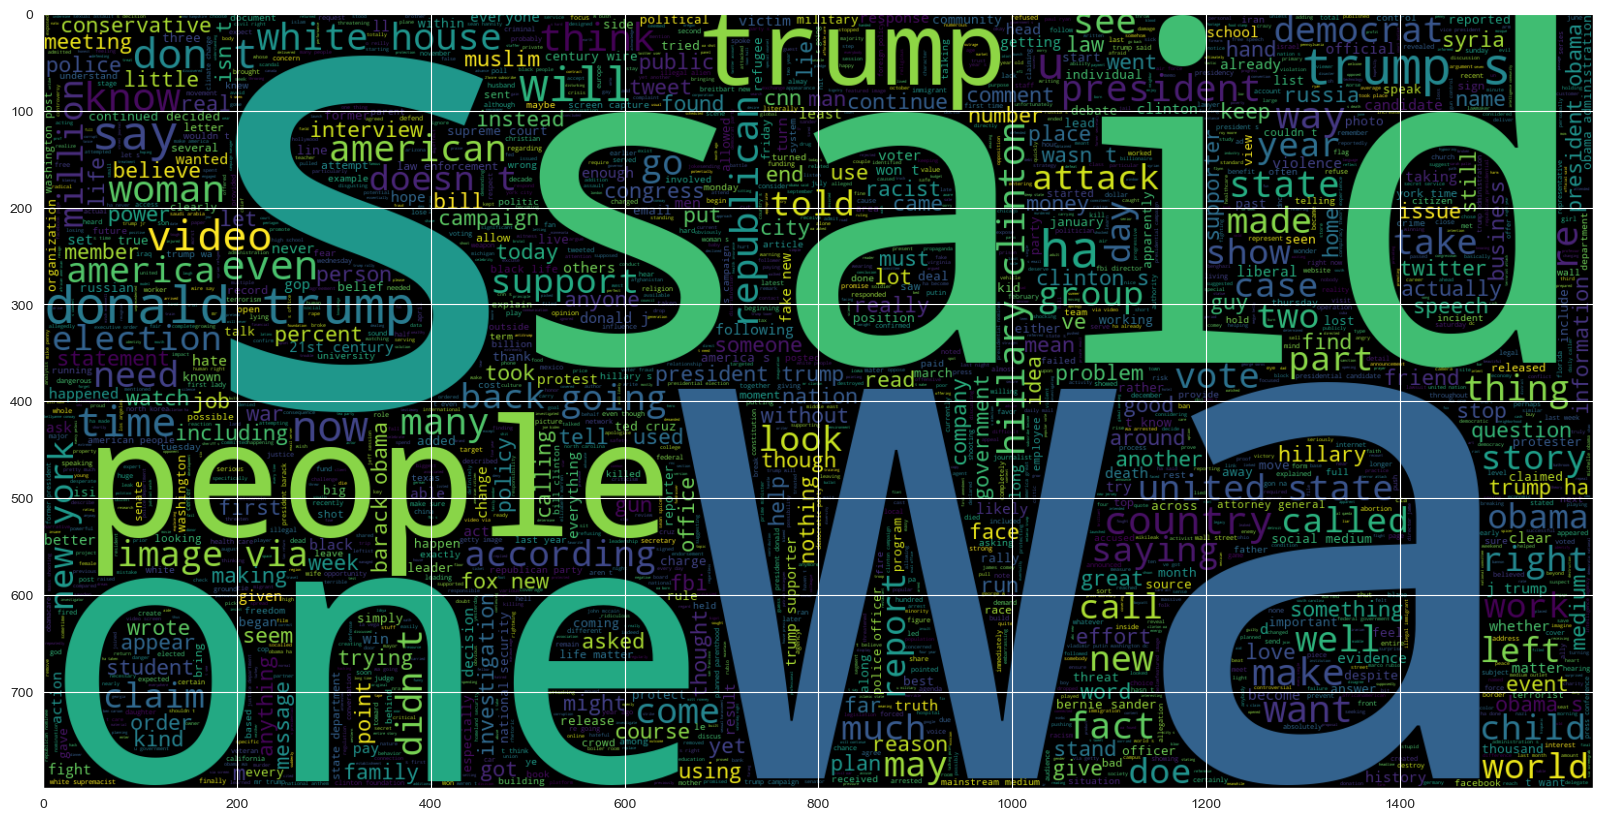

In [42]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in Fake dataset
plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==0].text))
plt.imshow(wc, interpolation = 'bilinear')

In [43]:
# Below is the graph to show number of available characters in True/Real and Fake news

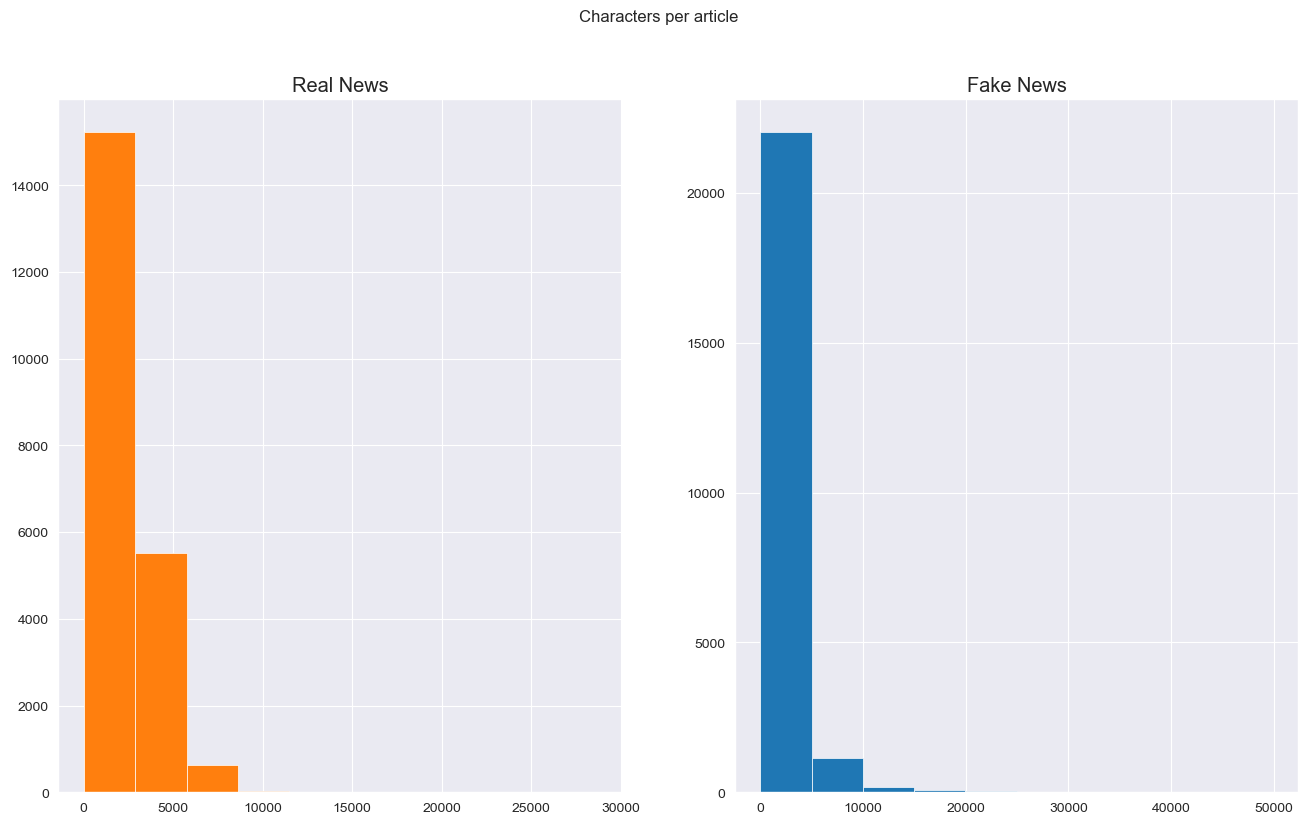

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Real News')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake News')
fig.suptitle('Characters per article')

plt.show()


In [45]:
# By looking at above graph it seems like 5000 or less characters in the text are more common in True/Real News
# where 10000 or less characters are most common in Fake news

In [46]:
# Below graph shows no. of original and fake texts available in both True/Real and Fake news

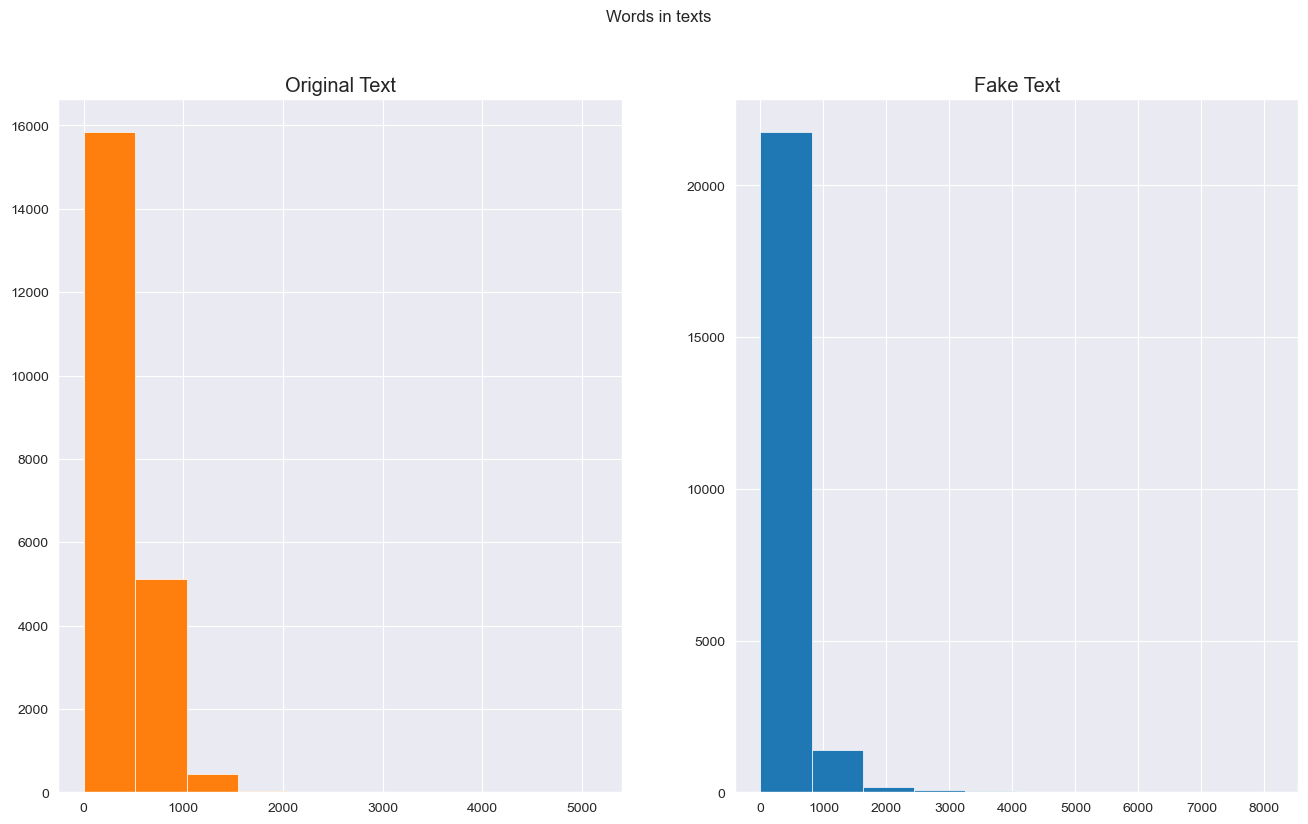

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Original Text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake Text')
fig.suptitle('Words in texts')

plt.show()

In [48]:
df1 = df.drop(['title_len','year','month','day_of_week'],axis=1)
df1.head()

text       subject       date  \
0  suspected boko haram suicide bomber kill at le...     worldnews 2017-12-02   
1  pakistan army role in focus a islamist end bla...     worldnews 2017-11-28   
2  the trump administration is helping scam unive...          News 2017-09-13   
3  senate delay healthcare vote a mccain recovers...  politicsNews 2017-07-16   
4  muslim immigrant beat 22term mn democratthanks...      politics 2016-08-13   

   category  
0         1  
1         1  
2         0  
3         1  
4         0

In [49]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
df1['polarity'] = df1['text'].apply(polarity)
df1.head(10)

text          subject  \
0  suspected boko haram suicide bomber kill at le...        worldnews   
1  pakistan army role in focus a islamist end bla...        worldnews   
2  the trump administration is helping scam unive...             News   
3  senate delay healthcare vote a mccain recovers...     politicsNews   
4  muslim immigrant beat 22term mn democratthanks...         politics   
5  al franken hilariously roast ted cruz during v...             News   
6  donald trump get brutally shut down by mickey ...             News   
7  china say nothing will stop it longrange air f...        worldnews   
8  angry dad confronts school board after finding...  Government News   
9  pope meet with angry jewish pr0 lateterm abort...        left-news   

        date  category  polarity  
0 2017-12-02         1 -0.100000  
1 2017-11-28         1  0.014490  
2 2017-09-13         0  0.145946  
3 2017-07-16         1  0.172421  
4 2016-08-13         0  0.222751  
5 2016-04-20         0  0.159633  
6 2016-04-08         0  0.040072  
7 2017-08-25         1  0.117697  
8 2017-05-05         0  0.074684  
9 2016-04-16         0  0.067370

In [51]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

df1['sentiment'] = df1['polarity'].apply(sentiment)
df1.head()


text       subject       date  \
0  suspected boko haram suicide bomber kill at le...     worldnews 2017-12-02   
1  pakistan army role in focus a islamist end bla...     worldnews 2017-11-28   
2  the trump administration is helping scam unive...          News 2017-09-13   
3  senate delay healthcare vote a mccain recovers...  politicsNews 2017-07-16   
4  muslim immigrant beat 22term mn democratthanks...      politics 2016-08-13   

   category  polarity sentiment  
0         1 -0.100000  Negative  
1         1  0.014490  Positive  
2         0  0.145946  Positive  
3         1  0.172421  Positive  
4         0  0.222751  Positive

<AxesSubplot:xlabel='sentiment', ylabel='count'>

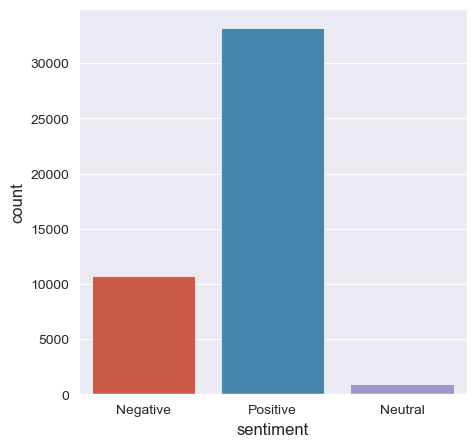

In [52]:
import seaborn as sns
fig = plt.figure(figsize = (5,5))
sns.countplot(x='sentiment', data = df1)

Text(0.5, 1.0, 'Sentiment distribution')

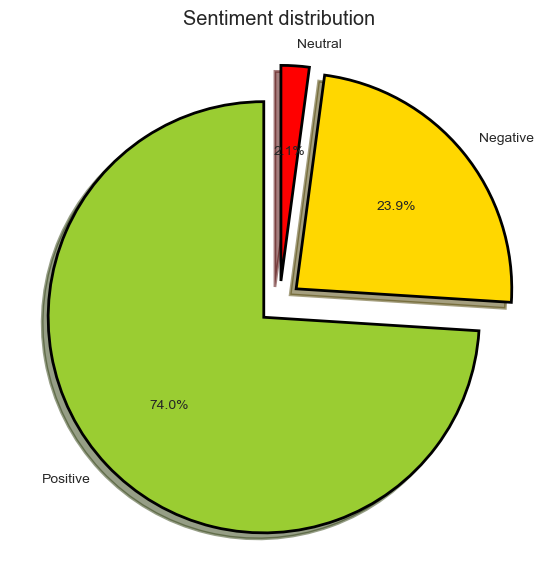

In [53]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold","red")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df1['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Sentiment distribution')

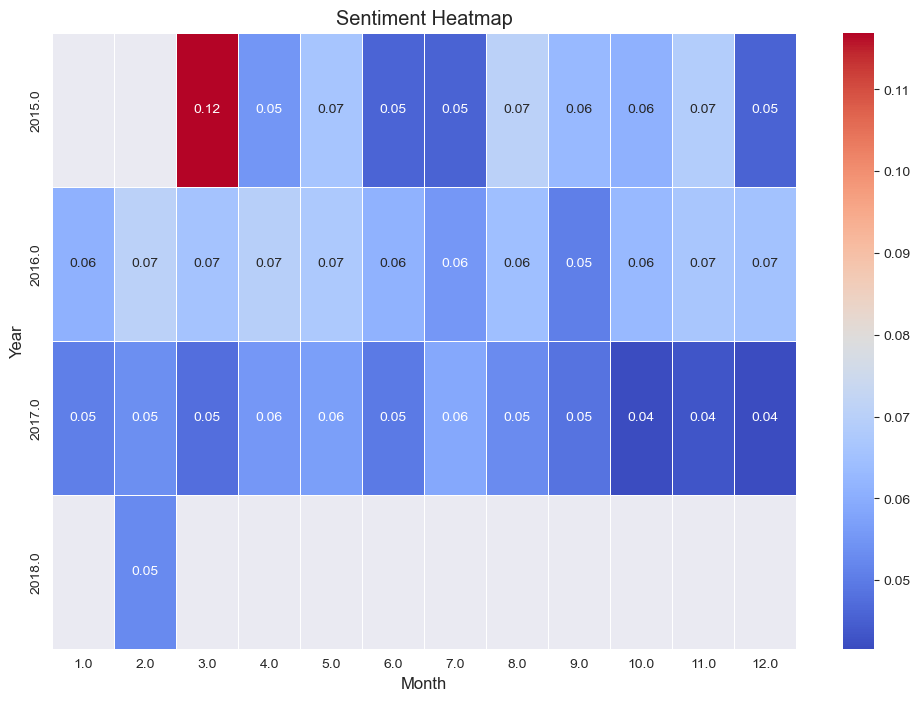

In [54]:
# Create a pivot table to aggregate sentiment scores over months and years
sentiment_pivot = df1.pivot_table(index=df1['date'].dt.year, columns=df1['date'].dt.month, values='polarity', aggfunc='mean')

# Plot the sentiment heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Sentiment Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Model Building

### Spliting of Data

In [55]:
X = df['text']
y = df['category']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Before we can train an algorithm to classify fake news articles, we need to extract features from it. it means reducing the mass of
# unstructured data into some uniform set of attributes that an algorithm can understand. 
# This will help to remove words which appear in more than 70% of the articles

# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [58]:
#import joblib

#joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

In [59]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [60]:
print(X_train_tfidf[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [61]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [62]:
# Multinomial Naive Bayes
# Predictions on the training set
y_pred_nb_train = nb_classifier.predict(X_train_tfidf)
# Print classification report and confusion matrix for the training set
print("Multinomial Naive Bayes - Classification Report for Training Set:\n", classification_report(y_train, y_pred_nb_train))
print("Multinomial Naive Bayes - Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_nb_train))
# Predictions on the test set
y_pred_nb_test = nb_classifier.predict(X_test_tfidf)
# Print classification report and confusion matrix for the test set
print("Multinomial Naive Bayes - Classification Report for Test Set:\n", classification_report(y_test, y_pred_nb_test))
print("Multinomial Naive Bayes - Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_nb_test))

Multinomial Naive Bayes - Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18808
           1       0.94      0.93      0.94     17110

    accuracy                           0.94     35918
   macro avg       0.94      0.94      0.94     35918
weighted avg       0.94      0.94      0.94     35918

Multinomial Naive Bayes - Confusion Matrix for Training Set:
 [[17758  1050]
 [ 1130 15980]]
Multinomial Naive Bayes - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4673
           1       0.94      0.92      0.93      4307

    accuracy                           0.93      8980
   macro avg       0.94      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Multinomial Naive Bayes - Confusion Matrix for Test Set:
 [[4420  253]
 [ 332 3975]]


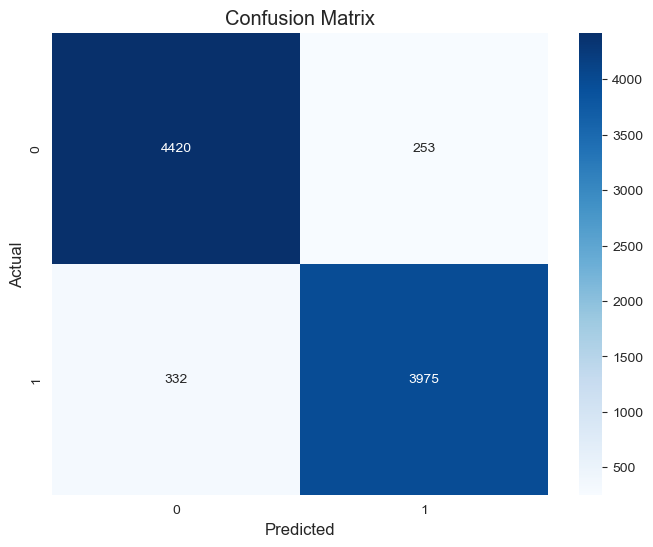

In [63]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [64]:
# 0 -  4453 were fake articles and the model also predicted it as fake
# 0 - 263 artcles were fake however model predicytd as Real
# 1 - 290 artcles were real however predicted as fake
# 1 - 3947 articles were real and predicted as real



In [65]:
# Create an instance of a logistic regression classifier
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(X_train_tfidf, y_train)


y_pred_lr_train = lr_classifier.predict(X_train_tfidf)
# Print classification report and confusion matrix for the training set
print("Logistic Regression - Classification Report for Training Set:\n", classification_report(y_train, y_pred_lr_train))
print("Logistic Regression - Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_lr_train))
# Predictions on the test set
y_pred_lr_test = lr_classifier.predict(X_test_tfidf)
# Print classification report and confusion matrix for the test set
print("Logistic Regression - Classification Report for Test Set:\n", classification_report(y_test, y_pred_lr_test))
print("Logistic Regression - Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_lr_test))

Logistic Regression - Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     18808
           1       0.99      0.99      0.99     17110

    accuracy                           0.99     35918
   macro avg       0.99      0.99      0.99     35918
weighted avg       0.99      0.99      0.99     35918

Logistic Regression - Confusion Matrix for Training Set:
 [[18630   178]
 [  122 16988]]
Logistic Regression - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4673
           1       0.99      0.99      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Logistic Regression - Confusion Matrix for Test Set:
 [[4619   54]
 [  45 4262]]


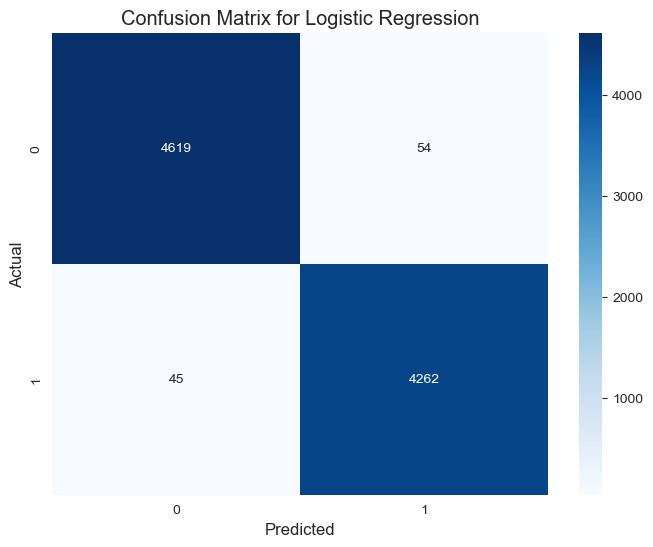

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [67]:
# LinearSVC
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()

svm_classifier.fit(X_train_tfidf, y_train)

# Predictions on the training set
y_pred_svm_train = svm_classifier.predict(X_train_tfidf)
# Print classification report and confusion matrix for the training set
print("LinearSVC - Classification Report for Training Set:\n", classification_report(y_train, y_pred_svm_train))
print("LinearSVC - Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_svm_train))
# Predictions on the test set
y_pred_svm_test = svm_classifier.predict(X_test_tfidf)
# Print classification report and confusion matrix for the test set
print("LinearSVC - Classification Report for Test Set:\n", classification_report(y_test, y_pred_svm_test))
print("LinearSVC - Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_svm_test))

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC - Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18808
           1       1.00      1.00      1.00     17110

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

LinearSVC - Confusion Matrix for Training Set:
 [[18790    18]
 [   14 17096]]
LinearSVC - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

LinearSVC - Confusion Matrix for Test Set:
 [[4656   17]
 [  16 4291]]


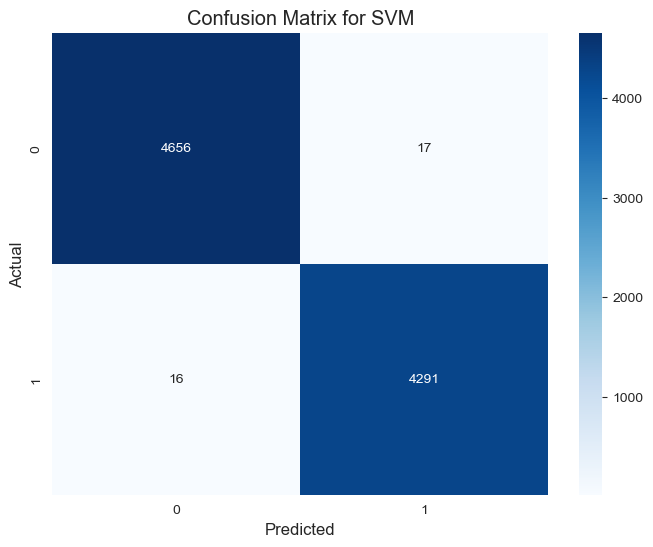

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

#Predictions on the training set
y_pred_rf_train = rf_classifier.predict(X_train_tfidf)

# Print classification report and confusion matrix for the training set
print("Classification Report for Training Set:\n", classification_report(y_train, y_pred_rf_train))
print("Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_rf_train))

# Predictions on the test set
y_pred_rf_test = rf_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix for the test set
print("Classification Report for Test Set:\n", classification_report(y_test, y_pred_rf_test))
print("Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_rf_test))

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18808
           1       1.00      1.00      1.00     17110

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix for Training Set:
 [[18808     0]
 [    0 17110]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix for Test Set:
 [[4662   11]
 [  19 4288]]


In [70]:
#joblib.dump(rf_classifier, 'fake_news_model.pkl')

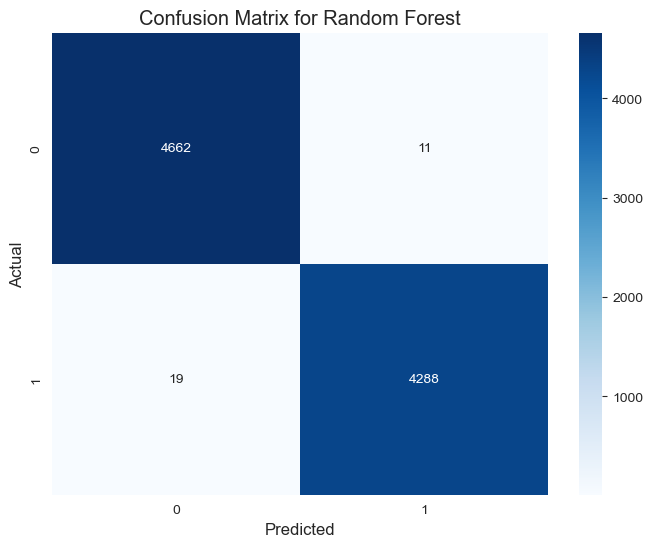

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train_tfidf, y_train)

# Predictions on the training set
y_pred_gb_train = GB_classifier.predict(X_train_tfidf)

# Print classification report and confusion matrix for the training set
print("Gradient Boosting - Classification Report for Training Set:\n", classification_report(y_train, y_pred_gb_train))
print("Gradient Boosting - Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_gb_train))

# Predictions on the test set
y_pred_gb_test = GB_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix for the test set
print("Gradient Boosting - Classification Report for Test Set:\n", classification_report(y_test, y_pred_gb_test))
print("Gradient Boosting - Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_gb_test))


Gradient Boosting - Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18808
           1       1.00      1.00      1.00     17110

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Gradient Boosting - Confusion Matrix for Training Set:
 [[18744    64]
 [   24 17086]]
Gradient Boosting - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4673
           1       0.99      1.00      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Gradient Boosting - Confusion Matrix for Test Set:
 [[4648   25]
 [  15 4292]]


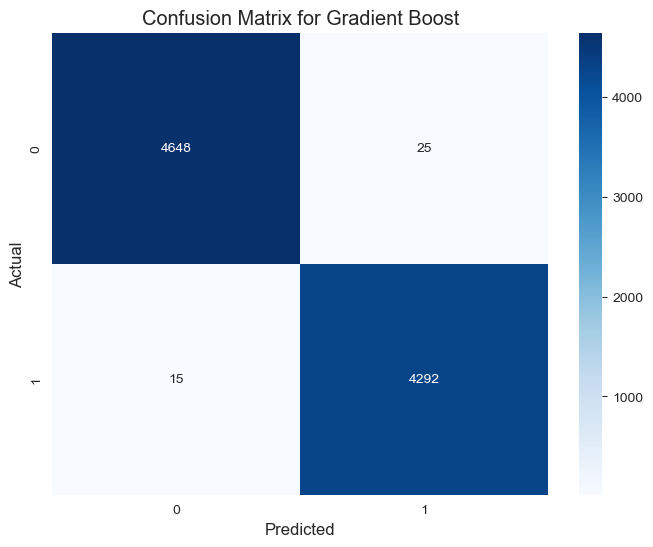

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boost')
plt.show()

In [74]:
from sklearn.linear_model import RidgeClassifier

# Initialize the Random Forest classifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

# Predictions on the training set
# Predictions on the training set
y_pred_ridge_train = ridge_classifier.predict(X_train_tfidf)

# Print classification report and confusion matrix for the training set
print("Classification Report for Training Set:\n", classification_report(y_train, y_pred_ridge_train))
print("Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_ridge_train))

# Predictions on the test set
y_pred_ridge_test = ridge_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix for the test set
print("Classification Report for Test Set:\n", classification_report(y_test, y_pred_ridge_test))
print("Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_ridge_test))


Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18808
           1       0.99      1.00      1.00     17110

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Confusion Matrix for Training Set:
 [[18720    88]
 [   32 17078]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4673
           1       0.99      1.00      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix for Test Set:
 [[4644   29]
 [  17 4290]]


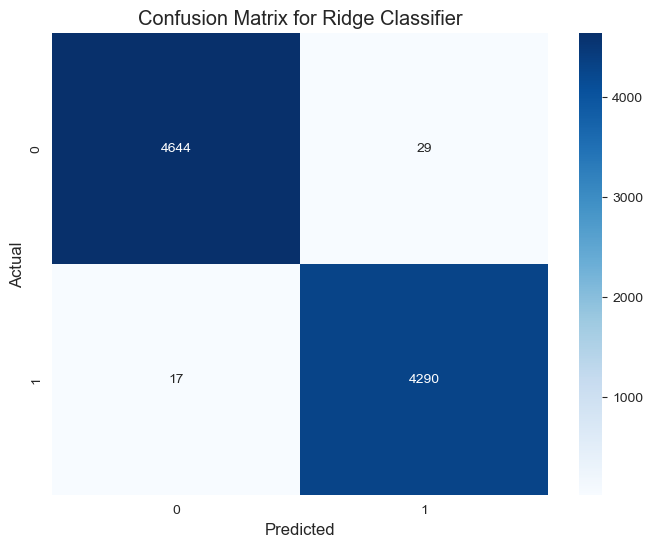

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ridge_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ridge Classifier')
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train)

# Predictions on the training set
y_pred_dt_train = dt_classifier.predict(X_train_tfidf)

# Print classification report and confusion matrix for the training set
print("Decision Tree - Classification Report for Training Set:\n", classification_report(y_train, y_pred_dt_train))
print("Decision Tree - Confusion Matrix for Training Set:\n", confusion_matrix(y_train, y_pred_dt_train))

# Predictions on the test set
y_pred_dt_test = dt_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix for the test set
print("Decision Tree - Classification Report for Test Set:\n", classification_report(y_test, y_pred_dt_test))
print("Decision Tree - Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_dt_test))

Decision Tree - Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18808
           1       1.00      1.00      1.00     17110

    accuracy                           1.00     35918
   macro avg       1.00      1.00      1.00     35918
weighted avg       1.00      1.00      1.00     35918

Decision Tree - Confusion Matrix for Training Set:
 [[18808     0]
 [    0 17110]]
Decision Tree - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4673
           1       1.00      0.99      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Decision Tree - Confusion Matrix for Test Set:
 [[4655   18]
 [  24 4283]]


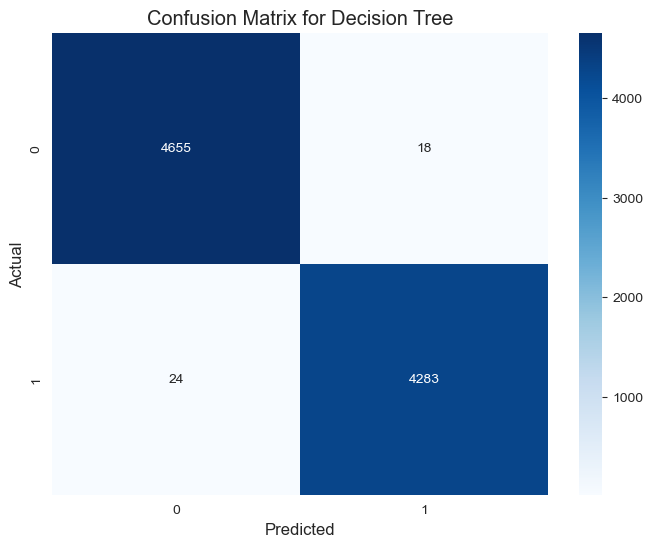

In [77]:
# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


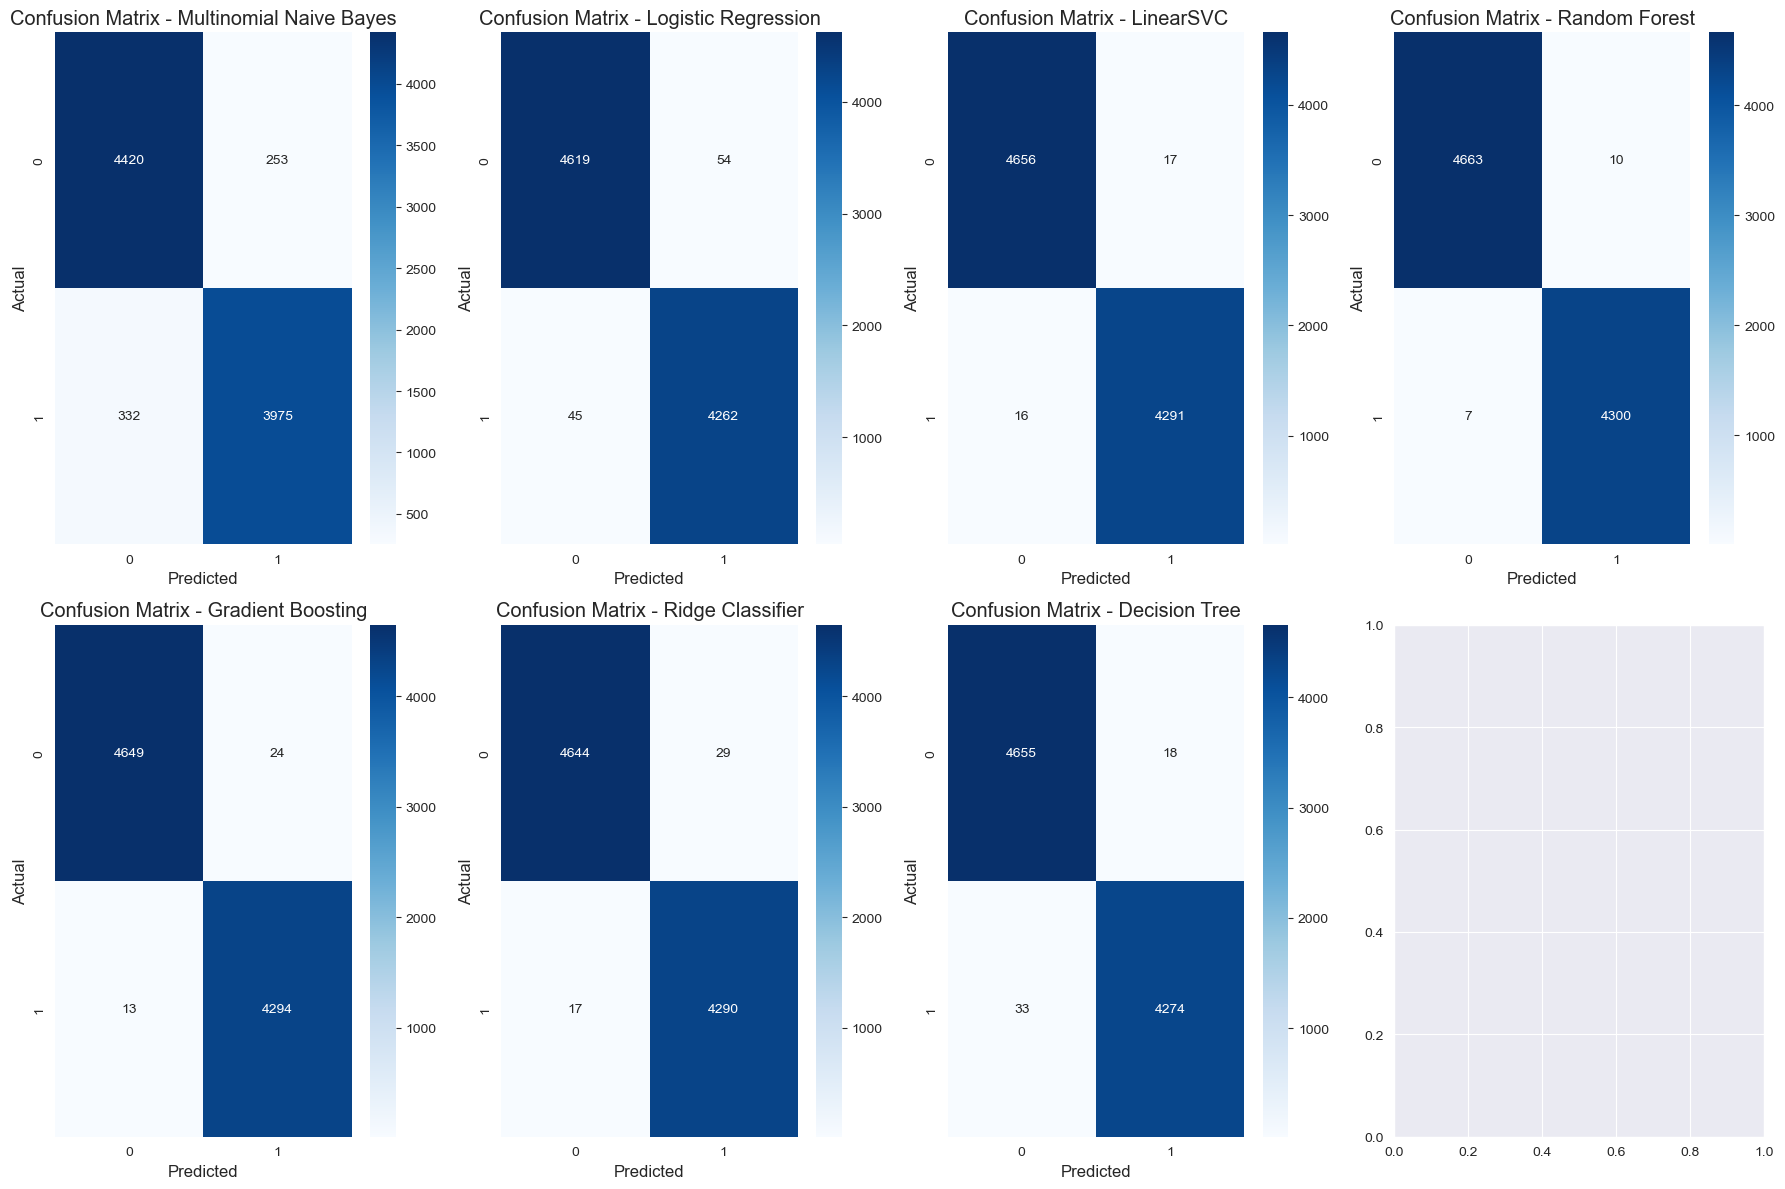

In [78]:
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('LinearSVC', LinearSVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Ridge Classifier', RidgeClassifier()),
    ('Decision Tree', DecisionTreeClassifier())  
]

# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for idx, (clf_name, clf) in enumerate(classifiers):
    clf.fit(X_train_tfidf, y_train)
    
    # Predictions on the test set
    y_pred_test = clf.predict(X_test_tfidf)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Create a heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx//4, idx%4])
    
    axes[idx//4, idx%4].set_title(f'Confusion Matrix - {clf_name}')
    axes[idx//4, idx%4].set_xlabel('Predicted')
    axes[idx//4, idx%4].set_ylabel('Actual')

# Show the plots
plt.tight_layout()
plt.show()

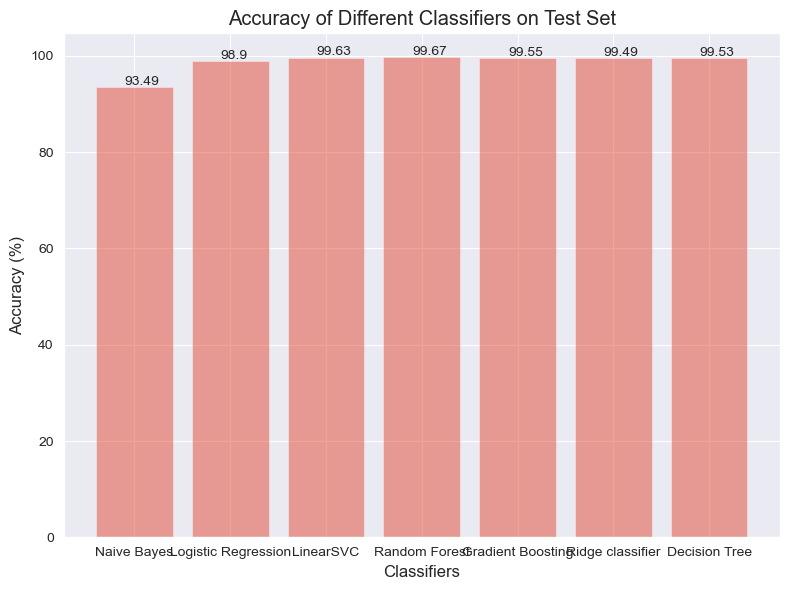

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


# Calculate the accuracy for each classifier
accuracy_nb = round(accuracy_score(y_test, y_pred_nb_test) * 100, 2)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr_test) * 100, 2)
accuracy_svm = round(accuracy_score(y_test, y_pred_svm_test) * 100, 2)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf_test) * 100, 2)
accuracy_gb = round(accuracy_score(y_test, y_pred_gb_test) * 100, 2)
accuracy_ridge = round(accuracy_score(y_test, y_pred_ridge_test) * 100, 2)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt_test) * 100, 2)

# Create a bar plot for the accuracy of each classifier
classifiers = ['Naive Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest','Gradient Boosting','Ridge classifier','Decision Tree']
accuracy = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_rf,accuracy_gb,accuracy_ridge,accuracy_dt]

y_pos = np.arange(len(classifiers))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers on Test Set')
plt.tight_layout()

# Add labels for the bars
for i in range(len(accuracy)):
    plt.text(x=i-0.1 , y=accuracy[i]+0.5 , s=str(accuracy[i]))

plt.show()

## Hyperparameter Tuning

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the randomized search model with n_iter=10 and cv=3
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=2, n_jobs=-1)



# Fit the randomized search to the data
random_search.fit(X_train_tfidf, y_train)

# Print the best parameters
print(random_search.best_params_)

# Use the best parameters to make predictions
y_pred_rf_test = random_search.predict(X_test_tfidf)

# Print classification report and confusion matrix for the test set
print("Classification Report for Test Set:\n", classification_report(y_test, y_pred_rf_test))
print("Confusion Matrix for Test Set:\n", confusion_matrix(y_test, y_pred_rf_test))

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Mayur\anaconda3\lib\site-packages\sk

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 87}
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      0.99      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix for Test Set:
 [[4654   19]
 [  23 4284]]


In [81]:
accuracy = accuracy_score(y_test, y_pred_rf_test)

# Print the accuracy score   
print("Accuracy Score for Test Set:", accuracy)

Accuracy Score for Test Set: 0.9953229398663697


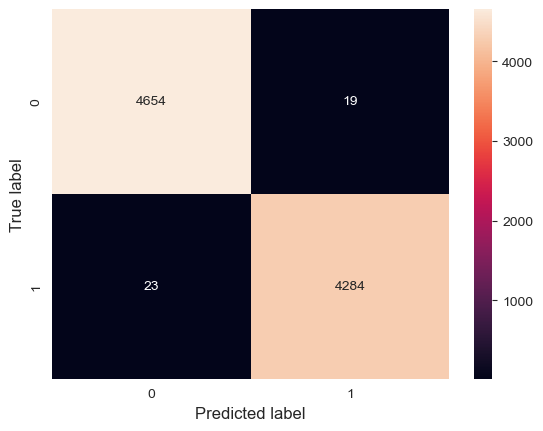

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf_test)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [83]:
import re

def wordopt(text):
    # Perform basic text preprocessing, such as removing special characters and converting to lowercase
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text


def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)  # Assuming wordopt is your text preprocessing function
    new_x_test = new_def_test['text']
    new_xv_test = tfidf_vectorizer.transform(new_x_test)  # Use the same TF-IDF vectorizer
    pred_RFC_hyperparam = random_search.best_estimator_.predict(new_xv_test)  # Use the best estimator from random_search
    pred_RF_default = rf_classifier.predict(new_xv_test)  # Predict using the model without hyperparameters
     
    print("\nRFC Predictions with hyperparameter:", output_label(pred_RFC_hyperparam[0]))
    print("RFC Predictions without hyperparameter:", output_label(pred_RF_default[0]))

In [84]:
news = str(input())
manual_testing(news)

Nile river is the longest river in the world

RFC Predictions with hyperparameter: Fake News
RFC Predictions without hyperparameter: Fake News
